In [31]:
import pandas as pd

# Read the text file as a CSV
df = pd.read_csv("deliverytime.txt")

# Display the first few rows
print(df.head())


     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0     

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from geopy.distance import geodesic

def calculate_distance(row):
    restaurant_coords = (row["Restaurant_latitude"], row["Restaurant_longitude"])
    delivery_coords = (row["Delivery_location_latitude"], row["Delivery_location_longitude"])
    return geodesic(restaurant_coords, delivery_coords).kilometers  # Distance in km

# Apply the function to each row
df["Distance_km"] = df.apply(calculate_distance, axis=1)

# Display updated DataFrame
print(df.head())

     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  \
0    

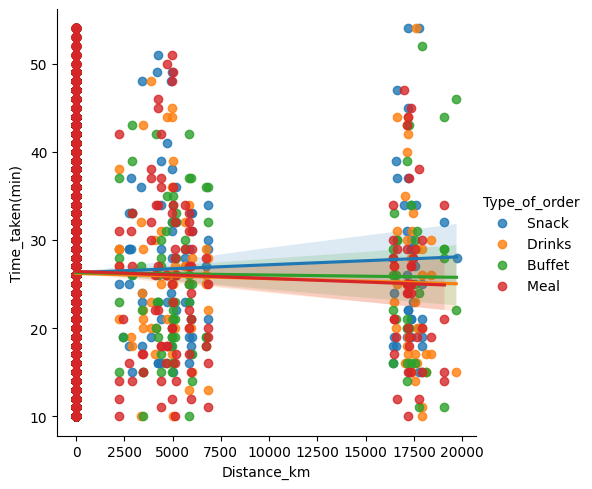

In [33]:
sns.lmplot(data=df, x='Distance_km', y='Time_taken(min)', hue='Type_of_order') # regression vs regression

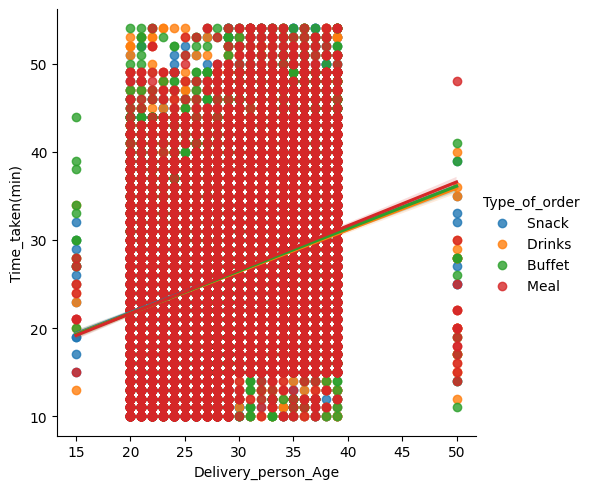

In [34]:
sns.lmplot(data=df, x='Delivery_person_Age', y='Time_taken(min)', hue='Type_of_order') # regression vs regression

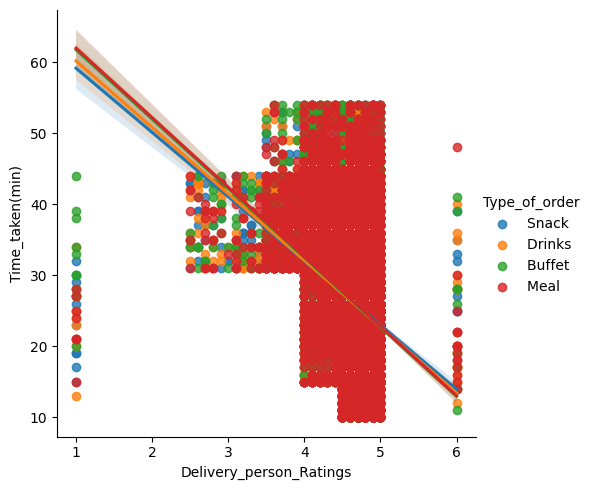

In [35]:
sns.lmplot(data=df, x='Delivery_person_Ratings', y='Time_taken(min)', hue='Type_of_order') # regression vs regression

In [36]:
fig = px.box(df,
             x="Type_of_vehicle",
             y="Time_taken(min)",
             )
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
data = df.copy()
X = np.array(data[["Delivery_person_Age",
                   "Delivery_person_Ratings",
                   "Distance_km"]])
y = np.array(data[["Time_taken(min)"]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Train the model using Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Display the first 5 actual vs predicted values
df_results = pd.DataFrame({
    "Actual": y_test[:5].flatten(),
    "Predicted": y_pred[:5].flatten()
})
print(df_results)

Mean Absolute Error (MAE): 6.60
Mean Squared Error (MSE): 71.37
R-squared (R²): 0.18
   Actual  Predicted
0      44  23.195541
1      41  26.324631
2      39  37.947801
3      38  29.010967
4      38  22.287942


In [44]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))

features = np.array([[a, b, c]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

Food Delivery Time Prediction
Age of Delivery Partner: 29
Ratings of Previous Deliveries: 2.9
Total Distance: 6
Predicted Delivery Time in Minutes =  [[41.51463199]]


In [47]:
from sklearn.model_selection import train_test_split
data = df.copy()
x = np.array(data[["Delivery_person_Age",
                   "Delivery_person_Ratings",
                   "Distance_km"]])
y = np.array(data[["Time_taken(min)"]])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.10,
                                                random_state=42)

# creating the LSTM neural network model
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=9)

Epoch 1/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 258s 6ms/step - loss: 75.0397
Epoch 2/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 256s 6ms/step - loss: 65.0843
Epoch 3/9
12616/41033 ━━━━━━━━━━━━━━━━━━━━ 2:57 6ms/step - loss: 62.7235

In [ ]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))

features = np.array([[a, b, c]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))